,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,level
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


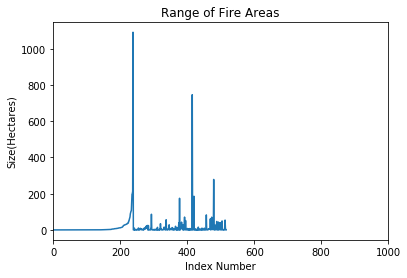

In [79]:
#importing necessary modules

#pandas is used for data manipulation
import pandas as pd

#importing modules from scikitlearn for machine learning
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



#loading csv data file

data = pd.read_csv("forestfires.csv")


#plotting line graph of index number vs area size of fires

%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(data.index, data.area)
plt.xlim(0, 1000)
plt.title('Range of Fire Areas')
plt.xlabel('Index Number')
plt.ylabel("Size(Hectares)")

#creating a column where the areas are give 
#a number from (0,1,2,3,4,5) depending on their size

level = []

for i in range(len(data["area"])):
    
    if data.iloc[i]["area"] < .101171:
        
        level.append(0)
    
    elif data.iloc[i]["area"] < 4.04686:
        
        level.append(1)
        
    elif data.iloc[i]["area"] < 40.4686:
        
        level.append(2)
    
    elif data.iloc[i]["area"] < 121.406:
        
        level.append(3)
    
    elif data.iloc[i]["area"] < 404.686:
        
        level.append(4)
 
    else:
        
        level.append(5)


#adding column into data frame         

data["level"] = level

data.head()



In [71]:
#importing KNN Classifier from sklearn

from sklearn.neighbors import KNeighborsClassifier


#setting value of knn constant 

knn = KNeighborsClassifier(n_neighbors=1)

# creating X value or independent variables and y value dependent or predicted value

feature_columns = ["temp","rain","wind", "RH","DC", "ISI","DMC","FFMC"]

X = data[feature_columns]

y = data["level"]

print(knn)

knn.fit(X,y)

#generating test data using random numbers

from random import randint

temp = []
rain = []
DC = []
FFMC = []
wind = []
ISI = []
DMC = []
RH = []

for i in range(576):
    
    #ranges are established based on the maximum and minimu values of each column
    
    temp.append(randint(3,35))
    rain.append(randint(0,7))
    DC.append(randint(8,861))
    FFMC.append(randint(19, 87))
    wind.append(randint(0,10))
    ISI.append(randint(0,67))
    DMC.append(randint(1,294))
    RH.append(randint(15,100))
    
# creating test_data dataframe
d = {'temp':temp,'rain':rain,"DC":DC,"FFMC":FFMC,"wind":wind,"ISI":ISI,"DMC":DMC,"RH":RH}

test_data = pd.DataFrame(d)

test_data.head()

#Predicting Fire Level Classifictions based on Test Data

X_new = test_data


c = knn.predict(X_new)

c = c.astype(object)


# Converting the numbered ranks to lettered ones for more pleasing presentation
for i in range(len(c)):
    if c[i] == 0:
        c[i] = "Class A"
    elif c[i] == 1:
        c[i] = "Class B"
    elif c[i] == 2:
        c[i] = "Class C"
    elif c[i] == 3:
        c[i] = "Class D"
    elif c[i] == 4:
        c[i] = "Class E"
    elif c[i] == 5:
        c[i] = "Class F"
      
        
print("Testing Data")
test_data.head()       

print("Predicted Level of Fire")
print(c)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Testing Data
Predicted Level of Fire
['Class A' 'Class D' 'Class B' 'Class D' 'Class B' 'Class B' 'Class B'
 'Class D' 'Class A' 'Class D' 'Class B' 'Class D' 'Class B' 'Class A'
 'Class D' 'Class D' 'Class C' 'Class D' 'Class B' 'Class B' 'Class B'
 'Class A' 'Class C' 'Class B' 'Class B' 'Class D' 'Class B' 'Class D'
 'Class D' 'Class C' 'Class B' 'Class A' 'Class B' 'Class D' 'Class B'
 'Class D' 'Class D' 'Class D' 'Class D' 'Class D' 'Class D' 'Class B'
 'Class D' 'Class B' 'Class B' 'Class D' 'Class B' 'Class D' 'Class D'
 'Class B' 'Class B' 'Class D' 'Class B' 'Class D' 'Class B' 'Class D'
 'Class D' 'Class B' 'Class D' 'Class B' 'Class D' 'Class B' 'Class D'
 'Class B' 'Class D' 'Class D' 'Class B' 'Class B' 'Class D' 'Class B'
 'Class D' 'Class D' 'Class D' 'Class B' 'Class B' 'Class D' 'Clas

In [73]:
#Test Data

from random import randint

temp = []
rain = []
DC = []
FFMC = []
wind = []
ISI = []
DMC = []
RH = []

for i in range(576):
    temp.append(randint(3,35))
    rain.append(randint(0,7))
    DC.append(randint(8,861))
    FFMC.append(randint(19, 87))
    wind.append(randint(0,10))
    ISI.append(randint(0,67))
    DMC.append(randint(1,294))
    RH.append(randint(15,100))
    
d = {'temp':temp,'rain':rain,"DC":DC,"FFMC":FFMC,"wind":wind,"ISI":ISI,"DMC":DMC,"RH":RH}

test_data = pd.DataFrame(d)

test_data.head

<bound method NDFrame.head of      temp  rain   DC  FFMC  wind  ISI  DMC  RH
0      11     0  234    67     4   35   44  43
1       9     1  554    87     8    0    8  76
2      32     7  683    44    10   63  204  36
3       3     3  499    58     1   22   23  82
4      12     5  118    44    10   47  117  45
..    ...   ...  ...   ...   ...  ...  ...  ..
571    29     7  844    70     0   36  146  71
572    21     4  190    70     7   57   14  26
573    21     6  795    21     4   47    3  58
574    19     1  124    83     8   45  285  40
575    34     2  472    37     7   67  200  44

[576 rows x 8 columns]>

In [82]:
#imporitng Grid search to determine best constant value for knn

from sklearn.model_selection import GridSearchCV

k_range = range(1,31)

param = dict()

param_grid = dict(n_neighbors = k_range)

print(param_grid)

## initiate grid

## data will split up into 10 sections and cross validated against eachother
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')

grid.fit(X,y)


{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [64]:
#putting results of gridsearchcv in pandas dataframe 

pd.DataFrame(grid.cv_results_)[["mean_test_score","std_test_score","params"]]

,mean_test_score,std_test_score,params
0,0.343929,0.098123,{'n_neighbors': 1}
1,0.388650,0.087785,{'n_neighbors': 2}
2,0.381071,0.092332,{'n_neighbors': 3}
3,0.407956,0.084772,{'n_neighbors': 4}
4,0.392609,0.068568,{'n_neighbors': 5}
5,0.413914,0.077039,{'n_neighbors': 6}
6,0.431184,0.064109,{'n_neighbors': 7}
7,0.431109,0.060584,{'n_neighbors': 8}
8,0.427300,0.055652,{'n_neighbors': 9}
9,0.427262,0.064160,{'n_neighbors': 10}


Text(0, 0.5, 'Cross-Validated Accuracy')

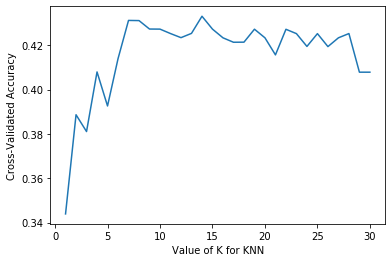

In [75]:
#graph that shows the accuracy of respective k values for knn

plt.plot(k_range, grid_mean_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [76]:
#outputs best k value for knn

print(grid.best_score_)
print(grid.best_params_)


0.4330693815987933
{'n_neighbors': 14}


In [70]:
#redoing KNN classfication model with constant 14 from GridSearch CV

knn2 = KNeighborsClassifier(n_neighbors=14)

knn2.fit(X,y)

predictions = knn.predict(test_data)


print(predictions)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [81]:
#Here we compare KNN and Logistic Regression models with crossvalidation 
#by splitting the data into 10 sections and testing against eachother

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.34615385 0.42307692 0.42307692 0.36538462 0.51923077 0.36538462
 0.15384615 0.33333333 0.25490196 0.25490196]


In [80]:
#Logistic Regressions shows more accuracy

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.4719079939668175


In [83]:
#use logistic regression model to predict wildfire classifications 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)


y_pred = logreg.predict(test_data)

print(y_pred)


[2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 0 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 0 1 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 1 2 2 2 5 2 2 2 2 2 1 5 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 2 2 2 2 2 2 